# Stage 1

## Obtain Street Graphs

### Walking Graph

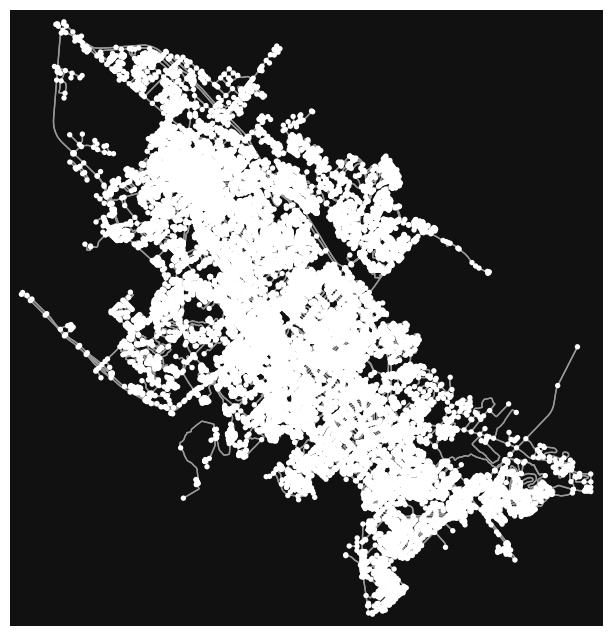

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
import osmnx
import networkx

walking_graph: networkx.MultiDiGraph = osmnx.graph_from_place(
    [
        'Bryan, USA',
        'College Station, USA'
    ],
    network_type='walk'
)

osmnx.plot_graph(walking_graph)

### Driving Graph

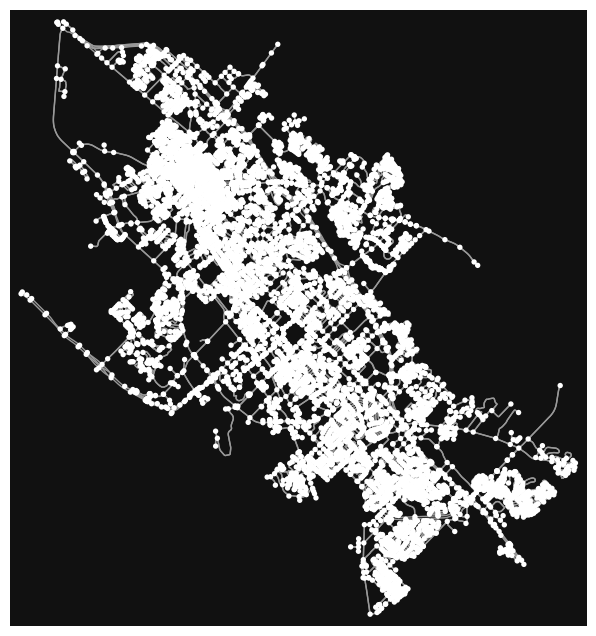

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [1]:
import osmnx
import networkx

driving_graph: networkx.MultiDiGraph = osmnx.graph_from_place(
    [
        'Bryan, USA',
        'College Station, USA'
    ],
    network_type='drive'
)

osmnx.plot_graph(driving_graph)

### Retrieve a Bus Route

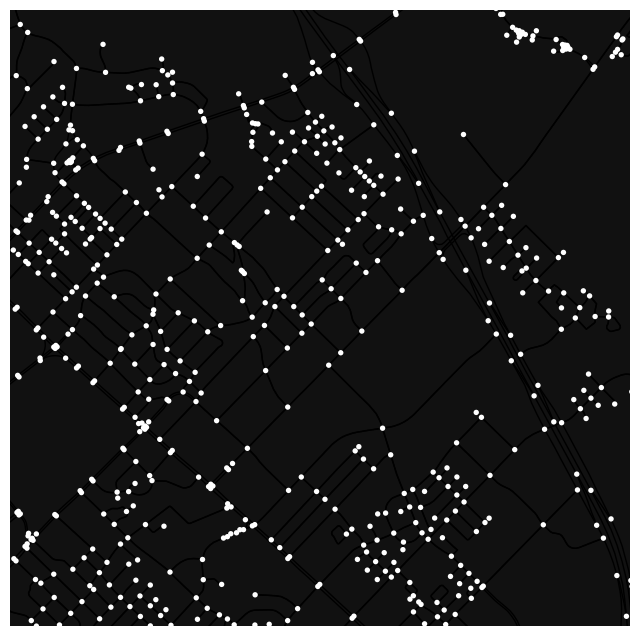

In [21]:
import osmnx
import networkx
from matplotlib import pyplot
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
from geopandas import GeoDataFrame

transit_graph: networkx.MultiDiGraph = osmnx.graph_from_place(
    [
        'Bryan, USA',
        'College Station, USA'
    ],
    network_type='drive',
)

bus_route_geometries: geopandas.GeoDataFrame = osmnx.geometries_from_place([
        'Bryan, USA',
        'College Station, USA'
    ],
    {
        'route': 'bus',
        'type':'route',
        'line':'bus',
    }
)

fig, ax = osmnx.plot_graph(transit_graph, show=False, close=False, edge_color='#000000')

for geometry in bus_route_geometries['geometry'].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            pass
            patch = PolygonPatch(polygon, fc='#cccccc', ec='k', linewidth=3, alpha=0.1, zorder=-1)
            ax.add_patch(patch)

margin = 1
west, south, east, north = bus_route_geometries.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))

pyplot.show()